In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/db89a4c3-18b5-4c3a-bffc-d69cbc507997')

In [9]:
csv_data = df.to_csv()
sortie = './donnees/election2017.csv'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodeDépartement    107 non-null    object 
 1   Département        107 non-null    object 
 2   Inscrits           107 non-null    int64  
 3   Abstentions        107 non-null    int64  
 4   Abstentions_ins    107 non-null    float64
 5   Votants            107 non-null    int64  
 6   Votants_ins        107 non-null    float64
 7   Blancs             107 non-null    int64  
 8   Blancs_ins         107 non-null    float64
 9   Blancs_vot         107 non-null    float64
 10  Nuls               107 non-null    int64  
 11  Nuls_ins           107 non-null    float64
 12  Nuls_vot           107 non-null    float64
 13  Exprimés           107 non-null    int64  
 14  Exprimés_ins       107 non-null    float64
 15  Exprimés_vot       107 non-null    float64
 16  LE PEN             107 non

In [18]:
colonnes_a_supprimer = ['Inscrits', 'Abstentions_ins', 'Votants_ins', 'Blancs_ins', 'Blancs_vot', 'Nuls_ins', 'Nuls_vot', 'Exprimés', 'Exprimés_ins', 'Exprimés_vot', 'LE PEN.ins', 'MACRON.ins', 'MÉLENCHON.ins', 'FILLON.ins', 'HAMON.ins', 'DUPONT-AIGNAN.ins', 'LASSALLE.ins', 'POUTOU.ins', 'ASSELINEAU.ins', 'ARTHAUD.ins', 'CHEMINADE.ins', 'LE PEN.exp', 'MACRON.exp', 'MÉLENCHON.exp', 'FILLON.exp', 'HAMON.exp', 'DUPONT-AIGNAN.exp', 'LASSALLE.exp', 'POUTOU.exp', 'ASSELINEAU.exp', 'ARTHAUD.exp', 'CHEMINADE.exp', 'Département', 'Votants']

df1 = df.drop(columns=colonnes_a_supprimer)

In [20]:
df_transforme = pd.melt(df1, id_vars=['CodeDépartement'], var_name='nom', value_name='votes')
df_transforme.columns = ['code_departement', 'nom', 'voix']
df_transforme.replace(to_replace='Abstentions', value='abstentions', inplace=True)
df_transforme.replace(to_replace='Blancs', value='blancs', inplace=True)
df_transforme.replace(to_replace='Nuls', value='nuls', inplace=True)


In [15]:
df = df.loc[df['code_departement'] != 'fr_etranger']

KeyError: 'code_departement'

In [ ]:
df_transforme.to_csv(sortie, index=False)

In [35]:
correspondance_partis = {'nom': ['MACRON', 'LE PEN', 'MÉLENCHON', 'LASSALLE', 'FILLON', 'HAMON', 'DUPONT-AIGNAN', 'POUTOU', 'ARTHAUD', 'abstentions', 'blancs', 'nuls', 'ASSELINEAU', 'CHEMINADE'],
                         'parti_politique': ['LREM', 'RN', 'LFI', 'Résistons', 'LR', 'PS', 'DLF', 'NPA', 'LO', 'abstentions','blancs', 'nuls', 'UPR','SAP' ]}


df_correspondance = pd.DataFrame(correspondance_partis)

df = pd.merge(df_transforme, df_correspondance, on='nom', how='left')
df = df.drop('nom', axis=1)

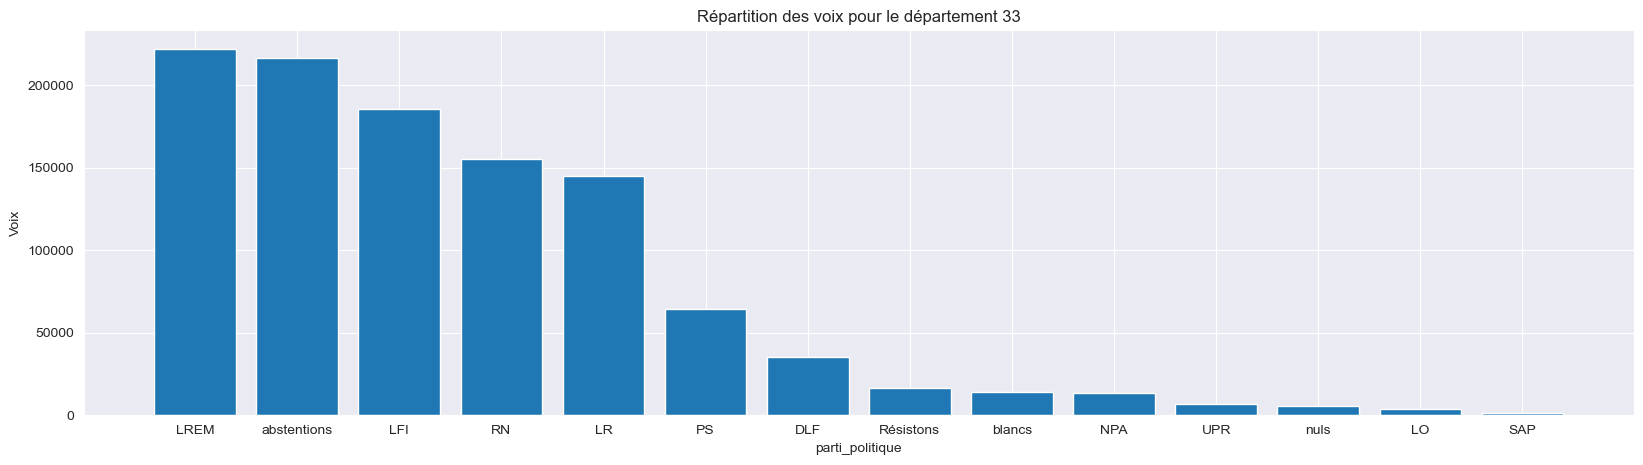

In [38]:
# DataViz

import matplotlib.pyplot as plt



code_departement_specifique = '33'
df_departement_specifique = df[df['code_departement'] == code_departement_specifique]
df_departement_specifique = df_departement_specifique.sort_values(by='voix', ascending=False)


# Création du diagramme à barres pour le département spécifié
plt.figure(figsize=(20, 5))
plt.bar(df_departement_specifique['parti_politique'], df_departement_specifique['voix'])
plt.xlabel('parti_politique')
plt.ylabel('Voix')
plt.title(f'Répartition des voix pour le département {code_departement_specifique}')
plt.show()
